In [1]:
import numpy as np
import matplotlib.pyplot as plt
import weightedstats as ws
from PIL import Image

# Question 3 - $L^p$ Solver

## 3.2, 3.3 - Implement

In [2]:
"""
approximate weighted L^P solver, using L^2 solutions.
"""
def Lp_solver(f, w, p, N, eps=1e-10, delta=1e-5, debug=False):
    m,n = f.shape
    fhat = np.ones((N,N))
    wtag = w

    for i in range(N):
        for j in range(N):
            ml, mh = i*m//N,(i+1)*m//N
            nl, nh = j*n//N,(j+1)*n//N
            w_ij = w[ml:mh,nl:nh] 
            f_ij = f[ml:mh,nl:nh]
            wtag_ij = w_ij # unimportant, always gets rewritten 
            tries = 0
            max_tries = 10

            def step():
                # get w from prev fhat
                wtag_ij = (np.minimum(1/eps, np.abs(f_ij - fhat[i,j])**(p-2) * w_ij))

                # get new fhat
                old_fhat = fhat[i,j]
                fhat[i,j] = np.sum((f_ij*wtag_ij))/np.sum(wtag_ij)
                return old_fhat
            
            old = step()
            while np.abs(fhat[i,j] - old) > delta and tries < max_tries:
                old = step()
                tries += 1

            wtag[ml:mh,nl:nh] = wtag_ij

    return fhat

In [3]:
"""
weighted L^1 solver.
"""
def L1_solver(f, w, N):
    m,n = f.shape
    fhat = np.ones((N,N))
    h = 1/f.shape[0]

    for i in range(N):
        for j in range(N):
            ml, mh = i*m//N,(i+1)*m//N
            nl, nh = j*n//N,(j+1)*n//N
            fij = f[ml:mh,nl:nh]
            wij = w[ml:mh,nl:nh]

            fhat[i,j] = ws.numpy_weighted_median(fij.flat,wij.flat)

    return fhat

In [4]:
def get_f_from_rep(fhat,m):
    f = np.ones((m,m))
    N = len(fhat)
    for i in range(N):
        for j in range(N):
            ml, mh = i*m//N,(i+1)*m//N
            nl, nh = j*m//N,(j+1)*m//N
            f[ml:mh,nl:nh] *= fhat[i,j]

    return f

In [5]:
"""
error for weighted Lp sampling.
"""
def Lp_error(f,fhat,p,w):
    h = 1/f.shape[0]
    return np.sum(np.abs(f - get_f_from_rep(fhat,f.shape[0]))**p*w*h**2)

## 3.4, 3.5 - Test

In [6]:
# load lena

lena_im = Image.open('data/lena_gray.bmp')
lena_arr = np.array(lena_im)
lena_arr = lena_arr / 255 # for values to be in the interval [0,1]
lena_vec = lena_arr.flatten()
lena_hist = np.unique(lena_arr, return_counts=True)

### some exact samples

In [ ]:
# some exact samples

w = np.ones(lena_arr.shape)

lena_hat = L1_solver(lena_arr, w, N=32)
lena_tag = get_f_from_rep(lena_hat, lena_arr.shape[0])
error32 = Lp_error(lena_arr, lena_hat, 1, w)
plt.imshow(lena_tag, cmap='gray')
plt.show()
lena_img_q = Image.fromarray((lena_tag*255).astype('uint8'), mode='L')
lena_img_q.save(f'images/L1_N32.bmp')

lena_hat = L1_solver(lena_arr, w, N=64)
lena_tag = get_f_from_rep(lena_hat, lena_arr.shape[0])
error64 = Lp_error(lena_arr, lena_hat, 1, w)
plt.imshow(lena_tag, cmap='gray')
plt.show()
lena_img_q = Image.fromarray((lena_tag*255).astype('uint8'), mode='L')
lena_img_q.save(f'images/L1_N64.bmp')

lena_hat = L1_solver(lena_arr, w, N=128)
lena_tag = get_f_from_rep(lena_hat, lena_arr.shape[0])
error128 = Lp_error(lena_arr, lena_hat, 1, w)
plt.imshow(lena_tag, cmap='gray')
plt.show()
lena_img_q = Image.fromarray((lena_tag*255).astype('uint8'), mode='L')
lena_img_q.save(f'images/L1_N128.bmp')

### some approximated samples

In [ ]:
# some approximated samples

w = np.ones(lena_arr.shape)

lena_hat = Lp_solver(lena_arr, w, p=1, N=32)
lena_tag = get_f_from_rep(lena_hat, lena_arr.shape[0])
error32 = Lp_error(lena_arr, lena_hat, 1, w)
plt.imshow(lena_tag, cmap='gray')
plt.show()
lena_img_q = Image.fromarray((lena_tag*255).astype('uint8'), mode='L')
lena_img_q.save(f'images/L1_N32_approx.bmp')

lena_hat = Lp_solver(lena_arr, w, p=1, N=64)
lena_tag = get_f_from_rep(lena_hat, lena_arr.shape[0])
error64 = Lp_error(lena_arr, lena_hat, 1, w)
plt.imshow(lena_tag, cmap='gray')
plt.show()
lena_img_q = Image.fromarray((lena_tag*255).astype('uint8'), mode='L')
lena_img_q.save(f'images/L1_N64_approx.bmp')

lena_hat = Lp_solver(lena_arr, w, p=1, N=128)
lena_tag = get_f_from_rep(lena_hat, lena_arr.shape[0])
error128 = Lp_error(lena_arr, lena_hat, 1, w)
plt.imshow(lena_tag, cmap='gray')
plt.show()
lena_img_q = Image.fromarray((lena_tag*255).astype('uint8'), mode='L')
lena_img_q.save(f'images/L1_N128_approx.bmp')

### Compare the exact and approximate results for different N, $\epsilon$

In [ ]:
w = np.ones(lena_arr.shape)

N_values = np.array([16,32,64,128,256])
eps_values = np.array([1e-1, 1e-2, 1e-3, 1e-4, 1e-5])

error_exact = np.ones((len(N_values),len(eps_values)))
error_apprx = np.ones((len(N_values),len(eps_values)))
for i,N in enumerate(N_values):
    print(f"working on N={N}.")
    lena_hat = L1_solver(lena_arr, w, N=N)
    lena_tag = get_f_from_rep(lena_hat, lena_arr.shape[0])
    error = Lp_error(lena_arr, lena_hat, 1, w)
    error_exact[i,:] = error
    print(f"error exact: {error}.")

    for j,eps in enumerate(eps_values):
        lena_hat = Lp_solver(lena_arr, w, p=1, N=N, eps=eps)
        lena_tag = get_f_from_rep(lena_hat, lena_arr.shape[0])
        error = Lp_error(lena_arr, lena_hat, 1, w)
        error_apprx[i,j] = error
        print(f"error approx: {error} eps={eps}.")

### $L^{\frac{3}{2}}$ and $L^4$

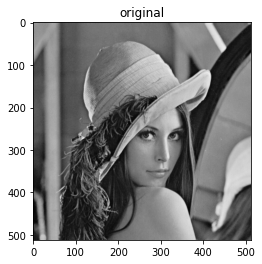

solving L^(3/2)


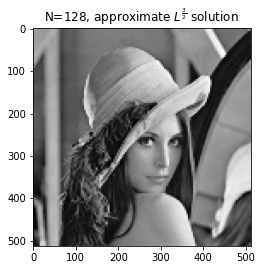

solving L^4


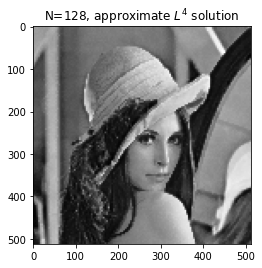

In [8]:
w = np.ones(lena_arr.shape)

plt.imshow(lena_arr, cmap='gray')
plt.title('original')
plt.show()

print("solving L^(3/2)")
lena_hat_32 = Lp_solver(lena_arr, w, p=3/2, N=128, eps=1e-5, delta=1e-5)
lena_tag_32 = get_f_from_rep(lena_hat_32, lena_arr.shape[0])
error_32 = Lp_error(lena_arr, lena_hat_32, 3/2, w)

plt.imshow(lena_tag_32, cmap='gray')
plt.title(r'N=128, approximate $L^{\frac{3}{2}}$ solution')
plt.show()

print("solving L^4")
lena_hat_4 = Lp_solver(lena_arr, w, p=4, N=128, eps=1e-5, delta=1e-5,debug=False)
lena_tag_4 = get_f_from_rep(lena_hat_4, lena_arr.shape[0])
error_4 = Lp_error(lena_arr, lena_hat_4, 4, w)

plt.imshow(lena_tag_4, cmap='gray')
plt.title(r'N=128, approximate $L^4$ solution')
plt.show()


lena_img_q = Image.fromarray((lena_tag_32*255).astype('uint8'), mode='L')
lena_img_q.save(f'images/L32_N128_approx.bmp')
lena_img_q = Image.fromarray((lena_tag_4*255).astype('uint8'), mode='L')
lena_img_q.save(f'images/L4_N128_approx.bmp')


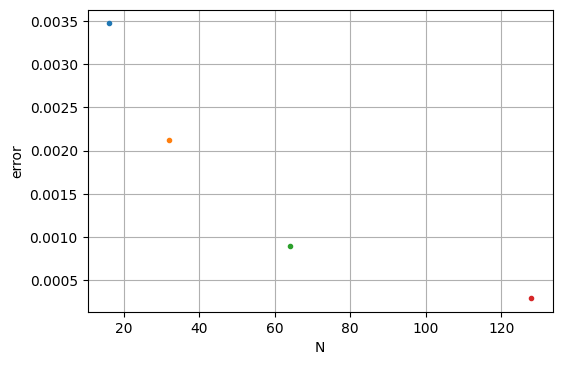

In [19]:
N_values = np.array([16,32,64,128])

plt.figure(dpi=100)
plt.grid()
plt.xlabel('N')
plt.ylabel('error')
for N in N_values:
    lena_hat_4 = Lp_solver(lena_arr, w, p=4, N=N, eps=1e-5, delta=1e-5,debug=False)
    lena_tag_4 = get_f_from_rep(lena_hat_4, lena_arr.shape[0])
    error_4 = Lp_error(lena_arr, lena_hat_4, 4, w)
    
    lena_img_q = Image.fromarray((lena_tag_4*255).astype('uint8'), mode='L')
    lena_img_q.save(f'images/L4_N{N}_approx.bmp')
    
    plt.plot(N, error_4, '.')

plt.savefig('plots/L4_N_error.png')
plt.show()


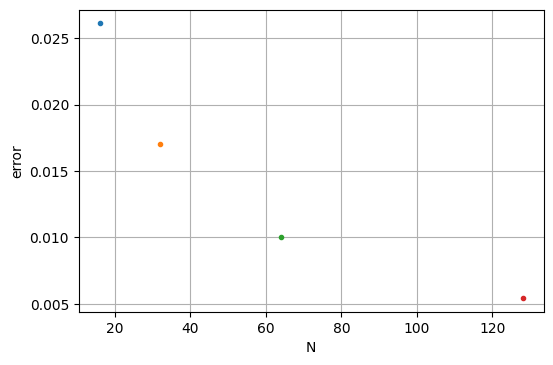

In [20]:
N_values = np.array([16,32,64,128])

plt.figure(dpi=100)
plt.grid()
plt.xlabel('N')
plt.ylabel('error')
for N in N_values:
    lena_hat_32 = Lp_solver(lena_arr, w, p=3/2, N=N, eps=1e-5, delta=1e-5,debug=False)
    lena_tag_32 = get_f_from_rep(lena_hat_32, lena_arr.shape[0])
    error_32 = Lp_error(lena_arr, lena_hat_32, 3/2, w)

    lena_img_q = Image.fromarray((lena_tag_32*255).astype('uint8'), mode='L')
    lena_img_q.save(f'images/L32_N{N}_approx.bmp')
    
    plt.plot(N, error_32, '.')

plt.savefig('plots/L32_N_error.png')
plt.show()